<a href="https://colab.research.google.com/github/rpandya5/gaitanalysis/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive to access the dataset
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Reading the SVM dataframe from my drive
import pandas as pd

df=pd.read_csv('/content/gdrive/My Drive/Copy of Baseline SVM Data.csv')

In [ ]:
#Making sure that the dataframe loaded in the correct shape
df.shape

(5408, 786)

In [ ]:
#Making sure the data loaded correctly
df[:10]

,Unnamed: 0,X_Acc_Mean_1,X_Acc_Max_1,X_Acc_Std_1,X_Acc_Min_1,X_Acc_IQR_1,X_Acc_Skew_1,X_Acc_Kurtosis_1,X_Acc_Energy_1,X_Acc_Jerk_1,...,Z_Gyro_Max_14,Z_Gyro_Std_14,Z_Gyro_Min_14,Z_Gyro_IQR_14,Z_Gyro_Skew_14,Z_Gyro_Kurtosis_14,Z_Gyro_Energy_14,Z_Gyro_Jerk_14,XY_Gyro_Cov_14,Label
0,0,-0.117356,0.268242,0.114100,-0.498164,0.153281,-0.296333,0.145814,0.026759,7.664063e-02,...,6.103516,0.754740,-1.403809,0.610352,3.808384,23.564672,0.616154,0.244141,-2.918971,1.0
1,1,0.137857,0.498164,0.087497,-0.114961,0.114961,0.228718,1.490968,0.026641,-1.916016e-02,...,0.854492,0.603752,-1.281738,1.098633,-0.255151,-1.366743,0.364631,0.274658,-0.743346,1.0
2,2,0.129139,4.023633,1.210323,-3.678750,1.120869,0.092365,1.787048,1.477896,1.341211e-01,...,1.098633,0.414096,-1.403809,0.488281,0.809174,1.065084,0.246484,0.213623,-0.972495,1.0
3,3,0.395657,3.678750,1.004194,-3.027305,1.082549,-0.027994,1.805821,1.162429,2.682422e-01,...,0.549316,0.299335,-1.159668,0.305176,-0.491489,0.881881,0.174139,0.274658,-1.026215,1.0
4,4,0.603545,3.640430,0.899917,-1.954336,1.072969,-0.276305,0.273580,1.172092,-3.065625e-01,...,0.000000,0.070302,-0.427246,0.061035,0.043760,-0.011590,0.051614,0.000000,-1.001044,1.0
5,5,0.806930,3.832031,1.140135,-2.145938,1.427432,-0.155982,-0.229226,1.947795,-7.089258e-01,...,-0.183105,0.056502,-0.427246,0.076294,-0.041359,-0.244950,0.093086,-0.061035,-0.993917,1.0
6,6,-0.310490,0.459844,0.182449,-0.996328,0.229922,0.526337,1.776467,0.129609,-3.552714e-17,...,0.915527,0.180337,-0.610352,0.244141,1.122562,4.735067,0.081528,-0.122070,-1.230687,1.0
7,7,0.625292,1.111289,0.075056,0.344883,0.076641,0.607506,4.424075,0.396609,-3.832031e-02,...,0.610352,0.252598,-0.854492,0.366211,-0.079912,-0.369215,0.099158,-0.244141,-0.913067,1.0
8,8,0.125786,3.065625,1.011045,-2.529141,1.571133,0.096970,0.019482,1.035479,-3.257227e-01,...,-0.122070,0.054467,-0.366211,0.061035,0.134109,-0.130579,0.075903,0.000000,-0.978728,1.0
9,9,0.278205,3.678750,1.041258,-2.337539,1.120869,0.418623,1.330673,1.158905,5.173242e-01,...,-0.122070,0.059256,-0.427246,0.061035,0.117004,-0.031864,0.069765,0.061035,-0.987441,1.0


In [ ]:
#Importing data split, model, and normalization functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
#Shuffling the data and removing the numberings to get rid of any potential bias
df_subset=df.sample(frac=1, random_state=42)
df_subset=df_subset.drop(['Unnamed: 0'],axis=1)
df_subset


,X_Acc_Mean_1,X_Acc_Max_1,X_Acc_Std_1,X_Acc_Min_1,X_Acc_IQR_1,X_Acc_Skew_1,X_Acc_Kurtosis_1,X_Acc_Energy_1,X_Acc_Jerk_1,Y_Acc_Mean_1,...,Z_Gyro_Max_14,Z_Gyro_Std_14,Z_Gyro_Min_14,Z_Gyro_IQR_14,Z_Gyro_Skew_14,Z_Gyro_Kurtosis_14,Z_Gyro_Energy_14,Z_Gyro_Jerk_14,XY_Gyro_Cov_14,Label
4270,-0.023280,7.242539,2.748128,-6.782695,2.692002,0.074087,0.143275,7.533868,-3.008145,-9.543482,...,38.940430,21.274400,-60.974121,33.020020,-0.362595,-0.411319,451.487070,-24.841309,287.057781,0.0
1615,-0.152323,0.114961,0.071001,-0.421523,0.076641,0.060693,1.012089,0.028231,0.019160,-9.141502,...,0.671387,0.924987,-3.723145,0.915527,-1.653236,2.037123,1.220424,-0.213623,1.575253,1.0
1924,0.610347,5.058281,1.556873,-3.027305,1.992656,0.157914,-0.059506,2.790316,-1.551973,-10.276741,...,105.529785,38.563099,-96.008301,52.490234,0.204692,0.067448,1483.443594,-15.869141,-208.547968,0.0
230,-0.344116,-0.038320,0.076058,-0.651445,0.076641,0.122958,0.994793,0.124187,-0.095801,-9.716403,...,0.671387,0.297230,-1.464844,0.244141,-0.728073,2.789098,0.157487,0.274658,-1.056237,1.0
465,0.946799,1.341211,0.093133,0.574805,0.114961,-0.097017,1.360830,0.905081,-0.076641,-10.224147,...,0.610352,0.196886,-0.488281,0.244141,0.638263,0.372691,0.039788,0.127822,-0.931739,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.068785,0.766406,0.111618,-0.459844,0.114961,1.164480,9.549787,0.017159,-0.114961,-9.502096,...,-0.671387,0.000000,-0.671387,0.000000,0.000000,0.000000,0.450760,0.000000,-1.000000,0.0
5191,0.328309,9.733359,3.117539,-9.043594,3.036885,0.188905,0.801530,9.802537,0.268242,-8.332273,...,66.040039,34.500746,-80.017090,59.844971,-0.021211,-0.969591,1191.031560,12.847900,-17.324212,0.0
5226,0.522689,6.092930,1.502216,-2.145938,2.155518,0.859884,0.659005,2.524215,-1.053809,-8.800643,...,43.334961,17.414875,-42.541504,22.155762,0.425257,0.113055,307.201259,17.822266,65.794724,0.0
5390,-1.235351,1.916016,1.160517,-3.295547,1.877695,0.536363,-0.665579,2.869524,-1.053809,-9.433024,...,5.126953,2.721808,-8.422852,3.173828,-0.502985,0.277682,10.085879,-2.593994,38.005895,0.0


In [ ]:
#Breaking the data into a df with no labels and df with only labels to train model
X=df_subset.drop('Label',axis=1)
Y=df_subset['Label']

#Normalizing the data
X=StandardScaler().fit_transform(X)

#Splitting the data and labels into training (80%) and testing(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Defining the model and fitting it to the training data
model=SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#Predicting the labels for the testing data
predict=model.predict(X_test)
print(predict)

[1. 1. 1. ... 0. 1. 0.]


In [ ]:
#Calculating the accuracy of the models predictions
score=model.score(X_test, Y_test)
print(f"The model accuracy is {score*100}%\nThe model error is {(1-score)*100}%")

The model accuracy is 99.72273567467653%
The model error is 0.27726432532347856%


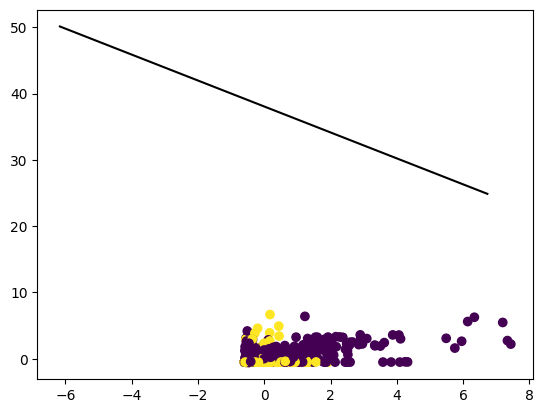

In [ ]:
#Importing libraries to attempt to visualize the SVM hyperplane
import matplotlib.pyplot as plt
import numpy as np

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_test[:,0].min(), X_test[:,1].max())
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-')
plt.scatter(X_test[:, 29], X_test[:, 562], c=Y_test)
plt.show()


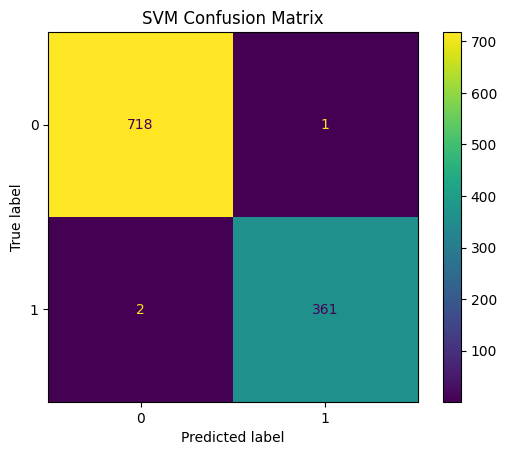

In [ ]:
#Calculating and plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
#View the rounded precision, recall, and f1score for the prediction
from sklearn.metrics import classification_report
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       719
         1.0       1.00      0.99      1.00       363

    accuracy                           1.00      1082
   macro avg       1.00      1.00      1.00      1082
weighted avg       1.00      1.00      1.00      1082



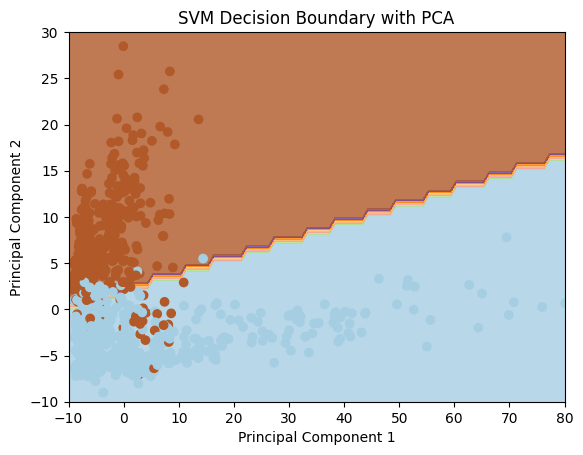

In [ ]:
#Using dimensionality reducer (PCA) to visualize the hyperplane

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a meshgrid to cover the PCA space
h = 1  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid (after transforming back to original space)
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)  # Reshape to match the meshgrid

# Plot the decision boundary and the test points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap=plt.cm.Paired)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.xlim(-10,80)
plt.ylim(-10,30)
plt.show()

In [ ]:
#Using dimensionality reducer t-SNE to help visualize the data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_test)

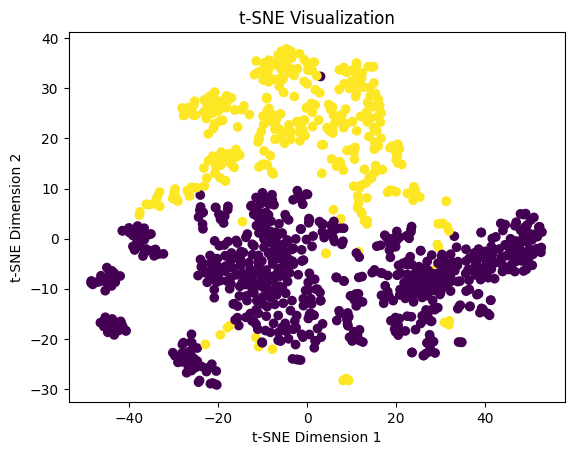

In [ ]:
#Plot the t-SNE data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_test)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()